In [142]:
import gspread
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gspread_dataframe import get_as_dataframe, set_with_dataframe

In [143]:
plt.rcParams['figure.figsize'] = [20, 10]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)
plt.style.use('seaborn-pastel')

In [144]:
sa = gspread.service_account()

In [145]:
sh = sa.open("Assets")

In [146]:
sh

<Spreadsheet 'Assets' id:1yOJilce4weCy7AogTrFVR_3cA568ikXlgTbl2yBahHg>

In [147]:
wks = sh.worksheet("rawData")

In [148]:
rawData = get_as_dataframe(wks)

In [149]:
data = rawData.iloc[:,0:5].loc[rawData.name.notnull()]

In [150]:
data

,date,name,type,cost,currentPrice
0,8-29-2022,BDMS,Thai Strock,1407.14,2109.00
1,8-29-2022,BTS,Thai Strock,1691.23,1302.00
2,8-29-2022,CPALL,Thai Strock,4616.49,4036.75
3,8-29-2022,HMPRO,Thai Strock,2141.13,2856.00
4,8-29-2022,MAJOR,Thai Strock,1061.78,1351.00
5,8-29-2022,SCGP256A,Thai Bound,20000.00,20000.00
6,8-29-2022,K-VIETNAM,Fund,11500.00,12193.14
7,8-29-2022,K-Change-A(A),Fund,9999.99,9826.62
8,8-29-2022,B-INNOTECH,Fund,7000.00,7692.00
9,8-29-2022,K-CHANGE-SSF,Fund,2500.00,1995.99


# Current Assets
- in Bath TH

In [151]:
currentPrice = data.currentPrice.sum()
currentPrice

157291.62

# Cost Assets
- in Bath TH

In [152]:
cost = data.cost.sum()
cost

155674.9

<AxesSubplot:xlabel='name'>

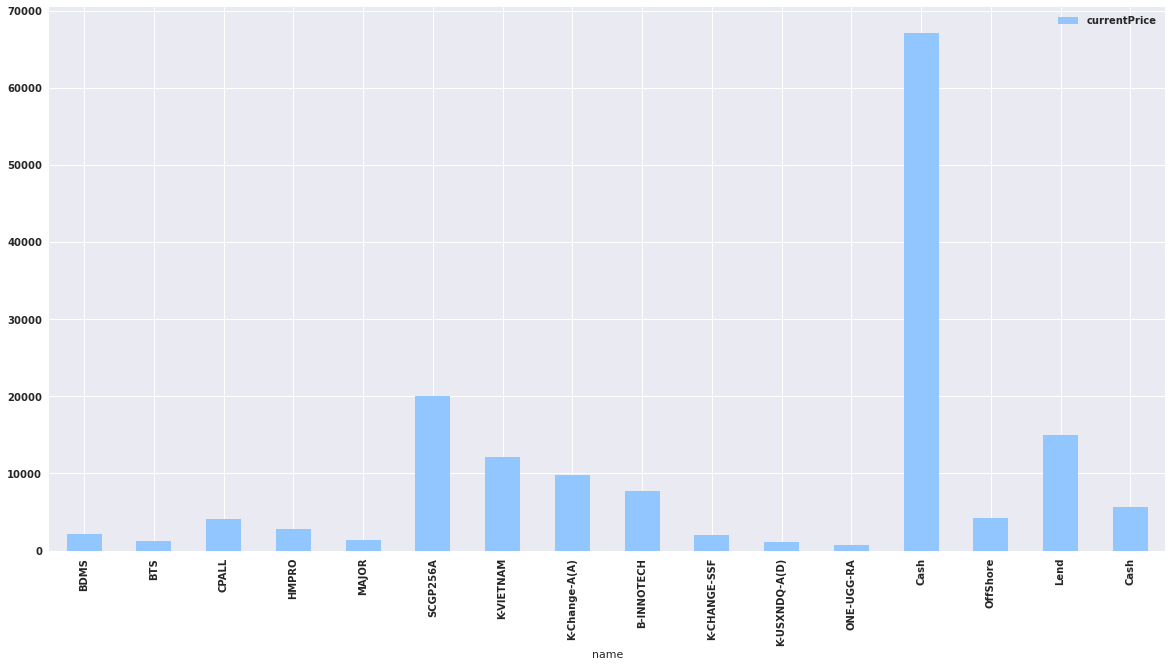

In [153]:
data.plot(x="name", y="currentPrice", kind="bar")

In [154]:
withOutCash = data.loc[(data.name != "Cash") & (data.name != "Lend")]
withOutCash.loc[:,["date","name"]]

,date,name
0,8-29-2022,BDMS
1,8-29-2022,BTS
2,8-29-2022,CPALL
3,8-29-2022,HMPRO
4,8-29-2022,MAJOR
5,8-29-2022,SCGP256A
6,8-29-2022,K-VIETNAM
7,8-29-2022,K-Change-A(A)
8,8-29-2022,B-INNOTECH
9,8-29-2022,K-CHANGE-SSF


<AxesSubplot:xlabel='name'>

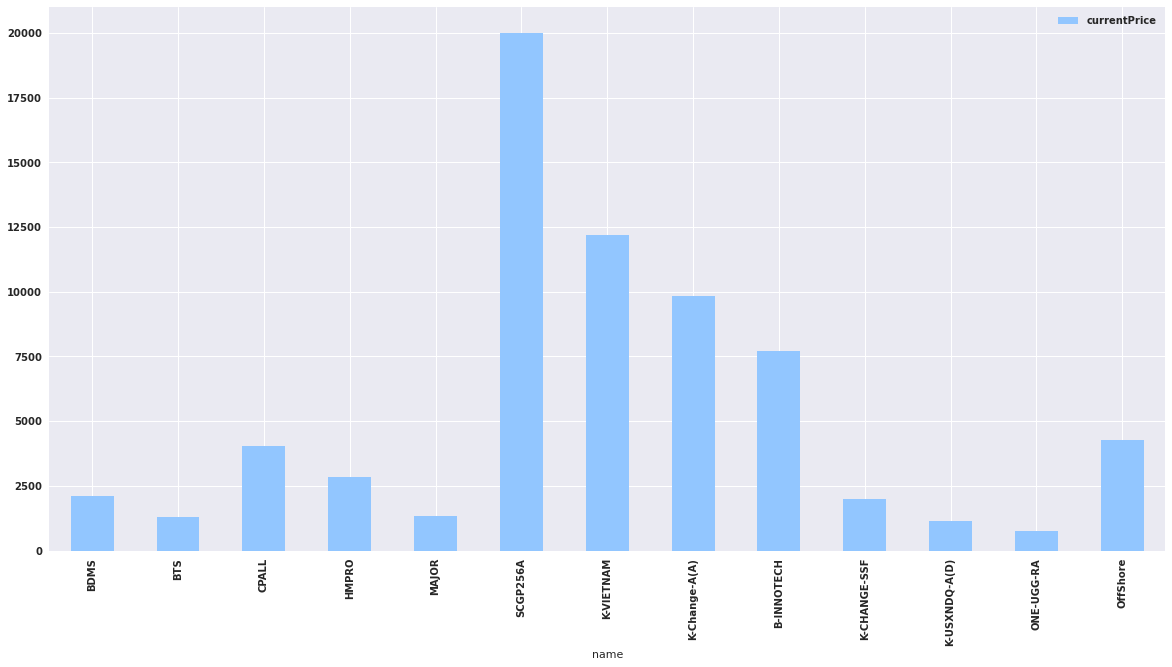

In [155]:
withOutCash.loc[:,["name", "currentPrice"]].plot(x="name", y="currentPrice", kind="bar")

([<matplotlib.patches.Wedge at 0x2569e3f6220>,
 [Text(1.095010160226464, 0.10465538209195895, 'BDMS'),
  Text(1.0659679580339656, 0.27150011499978766, 'BTS'),
  Text(0.9702542013713139, 0.5182728863459037, 'CPALL'),
  Text(0.7647825168473414, 0.7906375287858818, 'HMPRO'),
  Text(0.6016328039911195, 0.9208897703643925, 'MAJOR'),
  Text(-0.4140756842656274, 1.0190884788378056, 'SCGP256A'),
  Text(-1.0602524442265833, -0.2930268835986834, 'K-VIETNAM'),
  Text(-0.3316777512380153, -1.048804018553368, 'K-Change-A(A)'),
  Text(0.5130292801836117, -0.9730369765195388, 'B-INNOTECH'),
  Text(0.8770989585373782, -0.6638504477159345, 'K-CHANGE-SSF'),
  Text(0.9616735416240132, -0.5340262159672761, 'K-USXNDQ-A(D)'),
  Text(1.003796084208986, -0.44988156366615734, 'ONE-UGG-RA'),
  Text(1.0795171670462849, -0.21128815880773702, 'OffShore')])

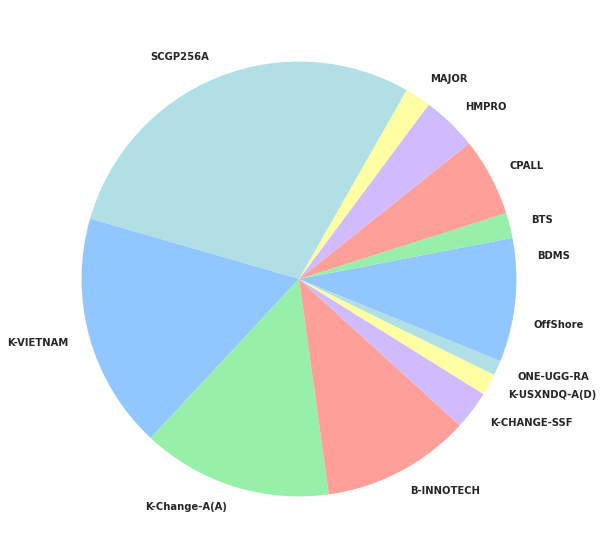

In [156]:
plt.pie(withOutCash["currentPrice"], labels=withOutCash["name"])

In [157]:
withOutCash["growth"] = ((withOutCash.currentPrice - withOutCash.cost) / withOutCash.cost) * 100
withOutCash

C:\Users\tongn\AppData\Local\Temp\ipykernel_11696\1680714026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withOutCash["growth"] = ((withOutCash.currentPrice - withOutCash.cost) / withOutCash.cost) * 100


,date,name,type,cost,currentPrice,growth
0,8-29-2022,BDMS,Thai Strock,1407.14,2109.00,49.878477
1,8-29-2022,BTS,Thai Strock,1691.23,1302.00,-23.014611
2,8-29-2022,CPALL,Thai Strock,4616.49,4036.75,-12.558026
3,8-29-2022,HMPRO,Thai Strock,2141.13,2856.00,33.387510
4,8-29-2022,MAJOR,Thai Strock,1061.78,1351.00,27.239164
5,8-29-2022,SCGP256A,Thai Bound,20000.00,20000.00,0.000000
6,8-29-2022,K-VIETNAM,Fund,11500.00,12193.14,6.027304
7,8-29-2022,K-Change-A(A),Fund,9999.99,9826.62,-1.733702
8,8-29-2022,B-INNOTECH,Fund,7000.00,7692.00,9.885714
9,8-29-2022,K-CHANGE-SSF,Fund,2500.00,1995.99,-20.160400


In [158]:
data.name.to_numpy()

array(['BDMS', 'BTS', 'CPALL', 'HMPRO', 'MAJOR', 'SCGP256A', 'K-VIETNAM',
       'K-Change-A(A)', 'B-INNOTECH', 'K-CHANGE-SSF', 'K-USXNDQ-A(D)',
       'ONE-UGG-RA', 'Cash', 'OffShore', 'Lend', 'Cash'], dtype=object)

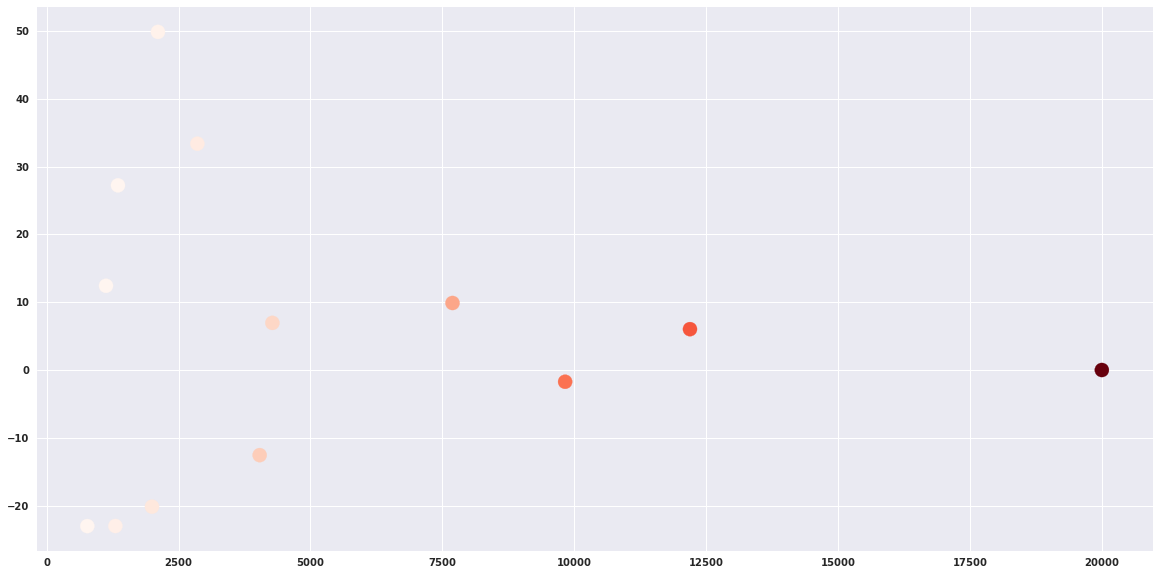

In [159]:
plt.scatter(x=withOutCash["currentPrice"], y=withOutCash["growth"],s=200, c=withOutCash["cost"],cmap='Reds')

In [160]:
groups = withOutCash.groupby('name')
groups.mean()

,cost,currentPrice,growth
name,,,
B-INNOTECH,7000.00,7692.00,9.885714
BDMS,1407.14,2109.00,49.878477
BTS,1691.23,1302.00,-23.014611
CPALL,4616.49,4036.75,-12.558026
HMPRO,2141.13,2856.00,33.387510
K-CHANGE-SSF,2500.00,1995.99,-20.160400
K-Change-A(A),9999.99,9826.62,-1.733702
K-USXNDQ-A(D),1000.00,1124.25,12.425000
K-VIETNAM,11500.00,12193.14,6.027304


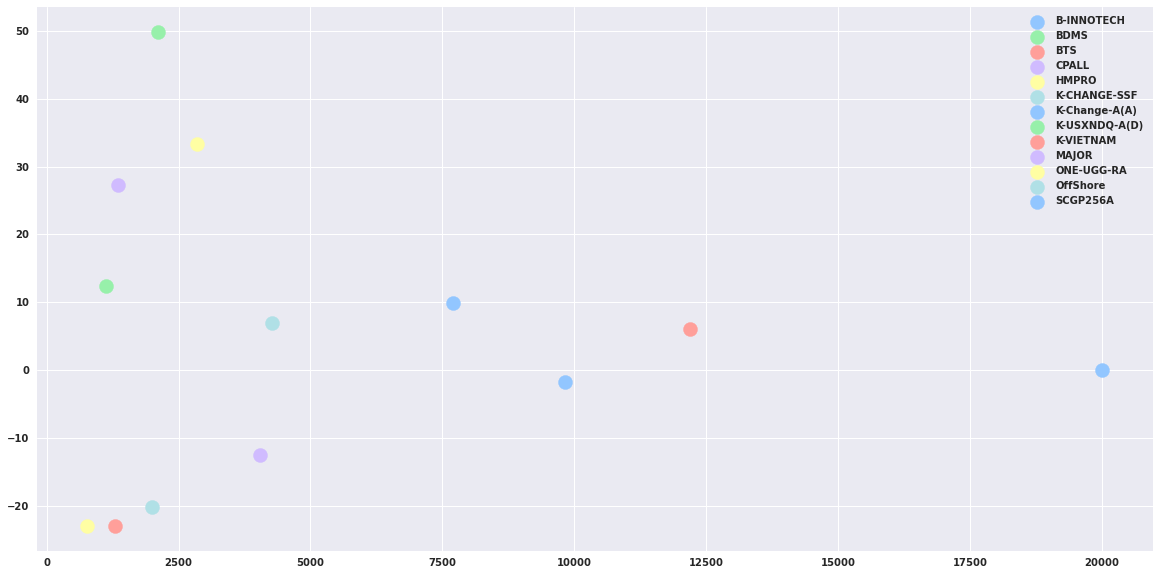

In [161]:
groups = withOutCash.groupby('name')
groups.sum()
for name, group in groups:
    plt.scatter(group["currentPrice"],group["growth"], label=name,s=200)
plt.legend()
plt.show()

In [162]:
withOutCash.groupby(["type"]).sum()

,cost,currentPrice,growth
type,,,
Cash,4000.00,4278.00,6.950000
Fund,32999.99,33601.73,-16.583083
Thai Bound,20000.00,20000.00,0.000000
Thai Strock,10917.77,11654.75,74.932515


In [163]:
groupByType = withOutCash.groupby(["type"]).sum()
groupByType['growth'] = ((groupByType.currentPrice - groupByType.cost) / groupByType.cost) * 100
groupByType = groupByType.reset_index()

In [164]:
groupByType

,type,cost,currentPrice,growth
0,Cash,4000.00,4278.00,6.950000
1,Fund,32999.99,33601.73,1.823455
2,Thai Bound,20000.00,20000.00,0.000000
3,Thai Strock,10917.77,11654.75,6.750280


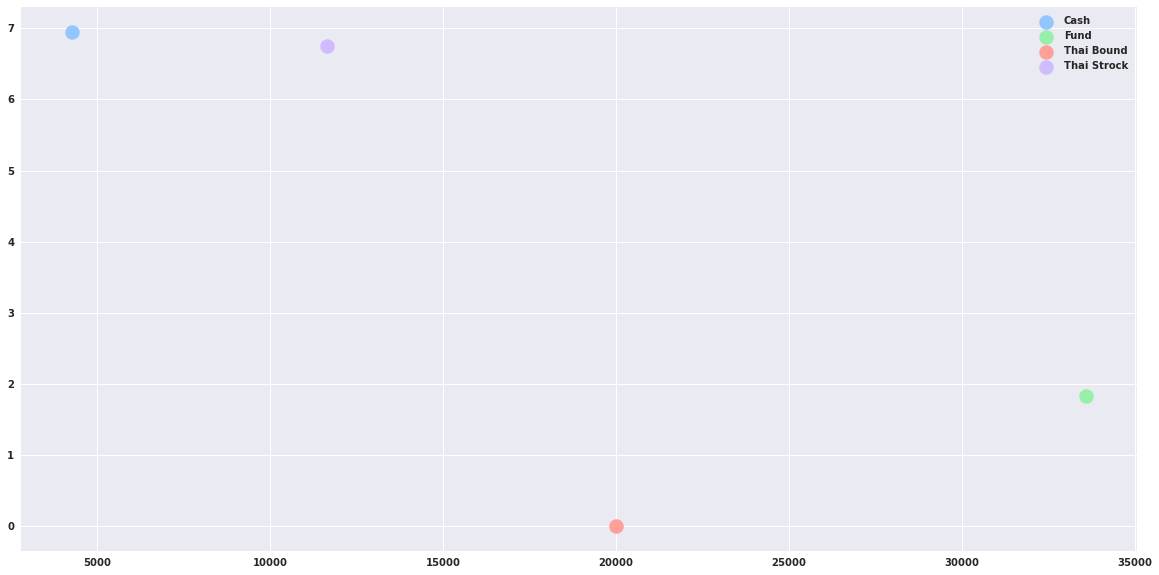

In [165]:
groups = groupByType.groupby('type')
groups.sum()
for types, group in groups:
    plt.scatter(group["currentPrice"],group["growth"], label=types,s=200)
plt.legend()
plt.show()

In [166]:
groupType = data.groupby(["type"]).sum()
groupType

,cost,currentPrice
type,,
Cash,76757.14,77035.14
Fund,32999.99,33601.73
Lend,15000.00,15000.00
Thai Bound,20000.00,20000.00
Thai Strock,10917.77,11654.75


([<matplotlib.patches.Wedge at 0x256a043b5e0>,
 [Text(0.035380962675332014, 1.0994308470659566, 'Cash'),
  Text(-0.9036317566024339, -0.627255648407888, 'Fund'),
  Text(0.00738858657993336, -1.099975185532997, 'Lend'),
  Text(0.7134850347121127, -0.8372210611552099, 'Thai Bound'),
  Text(1.0703314700365518, -0.2537529196864426, 'Thai Strock')])

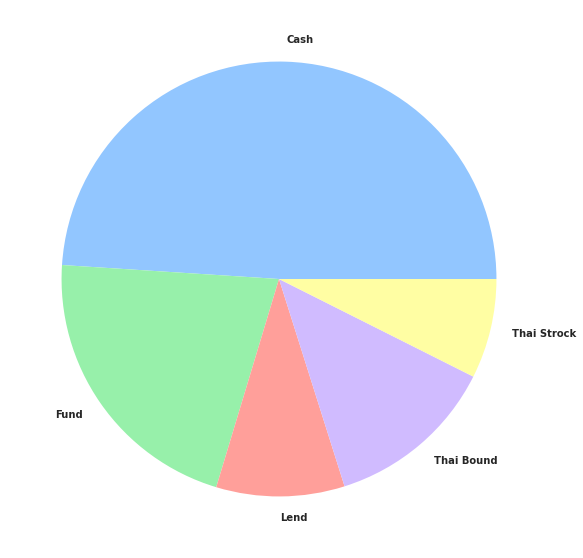

In [167]:
plt.pie(groupType["currentPrice"], labels=groupType.index)